# Presidential Election Trends

In this project, we shall analyze,visualize and compare presidential candidates using inbuilt python Libraries such as Seahorse, Numpy and Pandas.

For this we shall need to install these Libraries and import a dataset from Kaggle.


## Downloading the Dataset
We shall first download the data_set from Kaggle, This would require an API and the user name.
The User name and API can be generated using the accounts section after registering to Kaggle.


In [3]:
!pip install jovian opendatasets --upgrade --quiet

Let's begin by downloading the data, and listing the files within the dataset.

In this section you shall insert your username and API key that you have generated earlier, import the Pandas Library and set the url to download the dataset to be worked upon.

In [4]:
dataset_url = 'https://www.kaggle.com/tunguz/us-elections-dataset'
import pandas as pd

In [5]:
import opendatasets as od
od.download(dataset_url)

Skipping, found downloaded files in "./us-elections-dataset" (use force=True to force download)


The dataset has been downloaded and extracted.
Now we shall check the contents of the current working directory.

In [6]:
data_dir = './us-elections-dataset'

In [7]:
import os
print(os.listdir(data_dir))

['1976-2020-president.csv', '1976-2020-senate.csv']


After importing the os Library from python, we shall set the project name, install and import the jovian Library

In [8]:
project_name = "zerotopandas-course-project-starter"

In [9]:
!pip install jovian --upgrade -q

In [10]:
import jovian

In [11]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Updating notebook "pana1v/zerotopandas-course-project-starter" on https://jovian.ai


[jovian] Error: Looks like the notebook is missing output cells, please save the notebook and try jovian.commit again.


[jovian] Committed successfully! https://jovian.ai/pana1v/zerotopandas-course-project-starter


'https://jovian.ai/pana1v/zerotopandas-course-project-starter'

## Data Preparation and Cleaning

We shall now import the data into our very own data frame.



In [12]:
election_df = pd.read_csv('us-elections-dataset/1976-2020-president.csv')

Now that the import is complete, we will check the contents of the dataframe using a simple statement.

In [13]:
election_df

,year,state,state_po,state_fips,state_cen,state_ic,office,candidate,party_detailed,writein,candidatevotes,totalvotes,version,notes,party_simplified
0,1976,ALABAMA,AL,1,63,41,US PRESIDENT,"CARTER, JIMMY",DEMOCRAT,False,659170,1182850,20210113,NaN,DEMOCRAT
1,1976,ALABAMA,AL,1,63,41,US PRESIDENT,"FORD, GERALD",REPUBLICAN,False,504070,1182850,20210113,NaN,REPUBLICAN
2,1976,ALABAMA,AL,1,63,41,US PRESIDENT,"MADDOX, LESTER",AMERICAN INDEPENDENT PARTY,False,9198,1182850,20210113,NaN,OTHER
3,1976,ALABAMA,AL,1,63,41,US PRESIDENT,"BUBAR, BENJAMIN """"BEN""""",PROHIBITION,False,6669,1182850,20210113,NaN,OTHER
4,1976,ALABAMA,AL,1,63,41,US PRESIDENT,"HALL, GUS",COMMUNIST PARTY USE,False,1954,1182850,20210113,NaN,OTHER
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4282,2020,WYOMING,WY,56,83,68,US PRESIDENT,"JORGENSEN, JO",LIBERTARIAN,False,5768,278503,20210113,NaN,LIBERTARIAN
4283,2020,WYOMING,WY,56,83,68,US PRESIDENT,"PIERCE, BROCK",INDEPENDENT,False,2208,278503,20210113,NaN,OTHER
4284,2020,WYOMING,WY,56,83,68,US PRESIDENT,NaN,NaN,True,1739,278503,20210113,NaN,OTHER
4285,2020,WYOMING,WY,56,83,68,US PRESIDENT,OVERVOTES,NaN,False,279,278503,20210113,NaN,OTHER


* Checking the data type of the data-frame

In [14]:
type(election_df)

pandas.core.frame.DataFrame

In [15]:
election_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4287 entries, 0 to 4286
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   year              4287 non-null   int64  
 1   state             4287 non-null   object 
 2   state_po          4287 non-null   object 
 3   state_fips        4287 non-null   int64  
 4   state_cen         4287 non-null   int64  
 5   state_ic          4287 non-null   int64  
 6   office            4287 non-null   object 
 7   candidate         4000 non-null   object 
 8   party_detailed    3831 non-null   object 
 9   writein           4284 non-null   object 
 10  candidatevotes    4287 non-null   int64  
 11  totalvotes        4287 non-null   int64  
 12  version           4287 non-null   int64  
 13  notes             0 non-null      float64
 14  party_simplified  4287 non-null   object 
dtypes: float64(1), int64(7), object(7)
memory usage: 502.5+ KB


In [16]:
import jovian

In [40]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "pana1v/zerotopandas-course-project-starter" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/pana1v/zerotopandas-course-project-starter


'https://jovian.ai/pana1v/zerotopandas-course-project-starter'

## Exploratory Analysis and Visualization

The following section will see us use matpotlib visualizations extensively.

We shall use histograms and graphs to analyze election trends year on year



Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [41]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

To see the year on year trends, we need to sort candidates by the chronological order. 

In [42]:
election_df.sort_values(by='year')
election_df.tail(20)

,year,state,state_po,state_fips,state_cen,state_ic,office,candidate,party_detailed,writein,candidatevotes,totalvotes,version,notes,party_simplified
4267,2020,WISCONSIN,WI,55,35,25,US PRESIDENT,"BIDEN, JOSEPH R. JR",DEMOCRAT,False,1630866,3298041,20210113,NaN,DEMOCRAT
4268,2020,WISCONSIN,WI,55,35,25,US PRESIDENT,"TRUMP, DONALD J.",REPUBLICAN,False,1610184,3298041,20210113,NaN,REPUBLICAN
4269,2020,WISCONSIN,WI,55,35,25,US PRESIDENT,"BLANKENSHIP, DON",CONSTITUTION PARTY,False,5146,3298041,20210113,NaN,OTHER
4270,2020,WISCONSIN,WI,55,35,25,US PRESIDENT,"JORGENSEN, JO",INDEPENDENT,False,38491,3298041,20210113,NaN,OTHER
4271,2020,WISCONSIN,WI,55,35,25,US PRESIDENT,"CARROLL, BRIAN",AMERICAN SOLIDARITY PARTY,False,5259,3298041,20210113,NaN,OTHER
4272,2020,WISCONSIN,WI,55,35,25,US PRESIDENT,"WELLS, KASEY",INDEPENDENT,True,25,3298041,20210113,NaN,OTHER
4273,2020,WISCONSIN,WI,55,35,25,US PRESIDENT,"SIMMONS, JADE",BECOMING ONE NATION,True,36,3298041,20210113,NaN,OTHER
4274,2020,WISCONSIN,WI,55,35,25,US PRESIDENT,"BODDIE, R. PRESIDENT",INDEPENDENT,True,5,3298041,20210113,NaN,OTHER
4275,2020,WISCONSIN,WI,55,35,25,US PRESIDENT,"HAWKINS, HOWIE",GREEN,True,1089,3298041,20210113,NaN,OTHER
4276,2020,WISCONSIN,WI,55,35,25,US PRESIDENT,"LA RIVA, GLORIA ESTELLA",PARTY FOR SOCIALISM AND LIBERATION,True,110,3298041,20210113,NaN,OTHER


<AxesSubplot:xlabel='year', ylabel='totalvotes'>

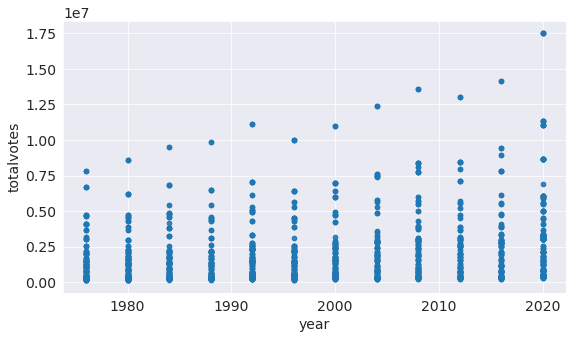

In [43]:

election_df.plot.scatter(x="year", y="totalvotes", alpha=0.5)

This particular scatter diagram shows the trend of total votes cast in each Presidential election.

The plot shows us a steady increase in the total number of votes being cast each election.

The highest being in 2020 and the lowest in 1980

In [44]:
election_df.columns

Index(['year', 'state', 'state_po', 'state_fips', 'state_cen', 'state_ic',
       'office', 'candidate', 'party_detailed', 'writein', 'candidatevotes',
       'totalvotes', 'version', 'notes', 'party_simplified'],
      dtype='object')

<AxesSubplot:xlabel='year', ylabel='candidatevotes'>

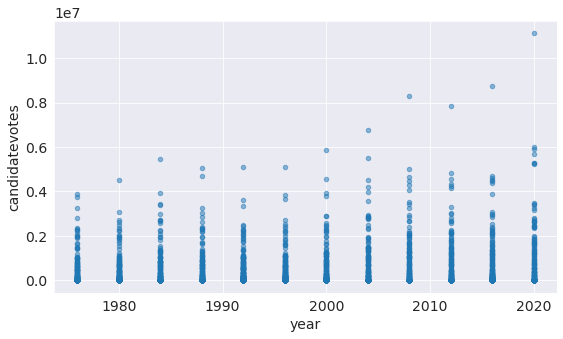

In [45]:
election_df.plot.scatter(x="year", y="candidatevotes", alpha=0.5)

As the second scatter diagram may suggest, the votes received by the candidates reflect the total votes cast to all candidates combined.

### Now, Our next step would be to draw a graph representing the votes collected by winning presidents in each election.

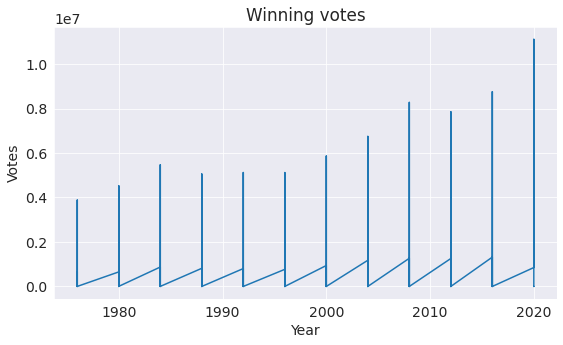

In [46]:
plt.title("Winning votes")
plt.xlabel("Year")
plt.ylabel("Votes")
plt.plot(election_df.year,election_df.candidatevotes)


Pay attention to how we have not had to find the winning candidate for every election,
Since all the candidate votes would overlap on the given year, 
The actual size seen is of the winning candidate(longest).

### Checking Party-wise Statistics

We have now successfully extracted a list containing the list of total candidates fielded by each party.
The command shows only the top 10 candidates in the list.

In [135]:
occur = election_df.groupby(['party_simplified']).size()
occur


party_simplified
DEMOCRAT      6
REPUBLICAN    4
dtype: int64

In [136]:
import jovian

In [137]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "pana1v/zerotopandas-course-project-starter" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/pana1v/zerotopandas-course-project-starter


'https://jovian.ai/pana1v/zerotopandas-course-project-starter'

## Asking and Answering Questions

Now we shall try some basic functions furnished by the Pandas Library.

#### Q1: How do you print the first n entries

In [138]:
head_df=election_df.head(6)

In [139]:
head_df

,year,state,state_po,state_fips,state_cen,state_ic,office,candidate,party_detailed,writein,candidatevotes,totalvotes,version,notes,party_simplified
3773,2020,CALIFORNIA,CA,6,93,71,US PRESIDENT,"BIDEN, JOSEPH R. JR",DEMOCRAT,False,11110250,17500881,20210113,NaN,DEMOCRAT
3425,2016,CALIFORNIA,CA,6,93,71,US PRESIDENT,"CLINTON, HILLARY",DEMOCRAT,False,8753788,14181595,20210113,NaN,DEMOCRAT
2751,2008,CALIFORNIA,CA,6,93,71,US PRESIDENT,"OBAMA, BARACK H.",DEMOCRAT,False,8274473,13561900,20210113,NaN,DEMOCRAT
3098,2012,CALIFORNIA,CA,6,93,71,US PRESIDENT,"OBAMA, BARACK H.",DEMOCRAT,False,7854285,13038547,20210113,NaN,DEMOCRAT
2432,2004,CALIFORNIA,CA,6,93,71,US PRESIDENT,"KERRY, JOHN",DEMOCRAT,False,6745485,12421353,20210113,NaN,DEMOCRAT
3774,2020,CALIFORNIA,CA,6,93,71,US PRESIDENT,"TRUMP, DONALD J.",REPUBLICAN,False,6006429,17500881,20210113,NaN,REPUBLICAN


#### Q2: Create a series representing number of Candidates in total from each State

In [101]:
native = election_df.groupby(['state']).size()
native
state_df["Native"]=native
state_df


,0,Native
state,,
ALABAMA,67,67
ALASKA,78,78
ARIZONA,79,79
ARKANSAS,90,90
CALIFORNIA,85,85
COLORADO,149,149
CONNECTICUT,76,76
DELAWARE,83,83
DISTRICT OF COLUMBIA,87,87


We have created a data frame with the total Number of Candidates from every state using the groupby() function.

#### Q3: What is the total votes of all the candidates listed in this dataset?

In [114]:
total_votes=election_df.totalvotes.sum()

In [115]:
total_votes

10147003830

The total of any numeral based column can be computed by using the function sum()

#### Q4: Show Most voted Presidents on a Timeline

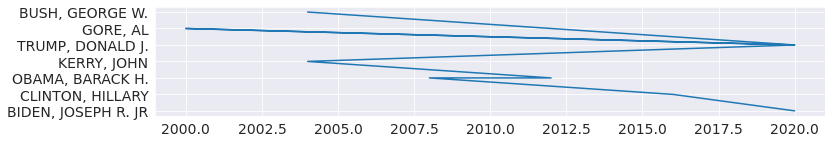

In [161]:
pop_df = election_df.sort_values('year',ascending=False).tail(10)
plt.figure(figsize=(12,2))

plt.plot(election_df.year,election_df.candidate)


This graph, though seeming complex represents three parameters, President, Popularity and Time

#### Q5: Group all Top Voted Presidents in a Histogram

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='candidatevotes', ylabel='candidate'>

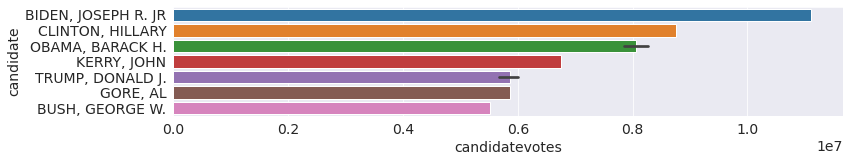

In [162]:
election_df = election_df.sort_values('candidatevotes',ascending=False).head(10)
plt.figure(figsize=(12,2))
sns.barplot( election_df.candidatevotes.head(10),election_df.candidate.head(10))

Let us save and upload our work to Jovian before continuing.

In [163]:
import jovian

In [164]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "pana1v/zerotopandas-course-project-starter" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/pana1v/zerotopandas-course-project-starter


'https://jovian.ai/pana1v/zerotopandas-course-project-starter'

## Inferences and Conclusion

This project amply demonstrates the simplicity and usefulness of the Pandas Library in operating databases.
The Pandas library accomplishes a lot of tasks which would require programmers to learn a different language such as SQL,
The MatPotLib further enhances the potency of Panda as a data management utility.

In [165]:
import jovian

In [166]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "pana1v/zerotopandas-course-project-starter" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/pana1v/zerotopandas-course-project-starter


'https://jovian.ai/pana1v/zerotopandas-course-project-starter'

## References and Future Work

I'd set up on working on a database management system for online retail enterprises which would encompass automation of many tasks over different online retail outlets.

In [167]:
import jovian

In [168]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "pana1v/zerotopandas-course-project-starter" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/pana1v/zerotopandas-course-project-starter


'https://jovian.ai/pana1v/zerotopandas-course-project-starter'